<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Evaluation_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation (Classification)

**Objective:** Measure the performance of a Classification model using the **Pima Indians Diabetes Dataset**.

---

## 1. The Metrics
In Classification, we measure **"Did we categorize it correctly?"** (Yes/No).

### **1. Accuracy**
* **Formula:** $\frac{\text{Correct Predictions}}{\text{Total Predictions}}$
* **Concept:** The percentage of times the model was right. Good for balanced datasets, but can be misleading if classes are imbalanced (e.g., 99% healthy, 1% sick).

### **2. Confusion Matrix**
* A table showing **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, and **False Negatives (FN)**.
* Helps visualize *where* the model is making mistakes.

### **3. Precision**
* **Formula:** $\frac{TP}{TP + FP}$
* **Concept:** Of all the people we **predicted** to have diabetes, how many actually had it? (Low precision = many false alarms).

### **4. Recall (Sensitivity)**
* **Formula:** $\frac{TP}{TP + FN}$
* **Concept:** Of all the people who **actually** have diabetes, how many did we find? (Low recall = we missed many sick people).

### **5. F1-Score**
* **Formula:** $2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
* **Concept:** A balance between Precision and Recall. Useful when you need a single number to compare models.

In [51]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries Imported")

Libraries Imported


## 2. Load Data (Pima Indians Diabetes)
We load the dataset directly from the URL.
* **X (Features):** Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigree, Age.
* **y (Target):** `Outcome` (0 = No Diabetes, 1 = Diabetes).

In [52]:
# Load dataset from URL
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv"

data = pd.read_csv(url)

# Select Features and Target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into Training and Testing sets
# It is crucial in classification to test on data the model hasn't seen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Loaded. Total Rows: {len(data)}")
print(f"Training on {len(X_train)} rows, Testing on {len(X_test)} rows.")
data.head()

Data Loaded. Total Rows: 768
Training on 614 rows, Testing on 154 rows.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# Checking for class imbalance
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


**Note:** Since this is a medical dataset where Recall (finding the sick people) is often more important than Precision, you can likely leave the data as is but use the right metrics.

Class Distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


/tmp/ipython-input-1340310287.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette='pastel')


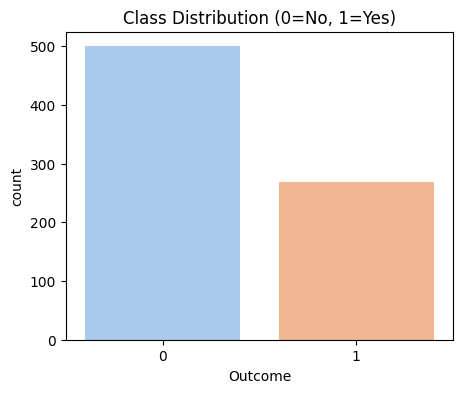

In [54]:
# Cell: Check Balance
print("Class Distribution:")
print(data['Outcome'].value_counts(normalize=True)) # Check percentages

# Visualization
plt.figure(figsize=(5, 4))
sns.countplot(x='Outcome', data=data, palette='pastel')
plt.title('Class Distribution (0=No, 1=Yes)')
plt.show()

# Note to self: Dataset is imbalanced (approx 2:1).
# Will prioritize F1-Score and ROC-AUC over Accuracy during evaluation.

## 3. Train Classifier & Predict
We will use **Logistic Regression**, a standard baseline algorithm for binary classification.

In [55]:
# Initialize and Train
clf_model = LogisticRegression(max_iter=1000) # Increased iterations for convergence
clf_model.fit(X_train, y_train)

# Make Predictions on the TEST set
y_pred = clf_model.predict(X_test)

print("Model Trained. Predictions generated for test set.")

Model Trained. Predictions generated for test set.


## 4. Visualization: Confusion Matrix
A scatter plot doesn't work well for simple Yes/No classification. Instead, we use a **Heatmap** of the Confusion Matrix to see exactly where the errors are.

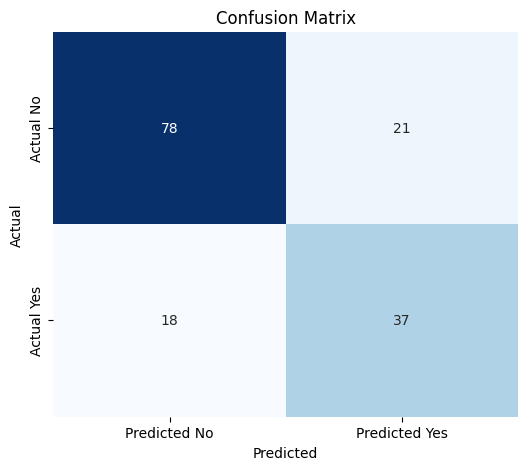

In [56]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
# Calculate all metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])

print("CLASSIFICATION EVALUATION REPORT:")

print(f"Accuracy: {accuracy:.2%}")

print("Detailed Metrics (Precision, Recall, F1):")
print(report)

CLASSIFICATION EVALUATION REPORT:
Accuracy: 74.68%
Detailed Metrics (Precision, Recall, F1):
              precision    recall  f1-score   support

 No Diabetes       0.81      0.79      0.80        99
    Diabetes       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## 5. Interpreting the Results

1.  **Confusion Matrix:** Look at the heatmap.
    * **Top-Left:** True Negatives (Correctly predicted healthy).
    * **Bottom-Right:** True Positives (Correctly predicted diabetes).
    * **Top-Right (False Positives):** Healthy people wrongly told they have diabetes (Type I Error).
    * **Bottom-Left (False Negatives):** Diabetic people wrongly told they are healthy (Type II Error - usually more dangerous in medicine).

2.  **F1-Score:** If the "No Diabetes" F1 is high (e.g., 0.80) but the "Diabetes" F1 is low (e.g., 0.65), the model is good at finding healthy people but struggling to detect the disease.

**Accuracy: 74.68%** is a **Classification Metric**. It tells you how often the model's prediction was correct overall.

Let's see how it is calculated:

### **1. The Concept**

  * **Definition:** Accuracy represents the proportion of **all** predictions (both Positive and Negative) that were correct.
  * **In Plain English:** If your model made predictions for 100 patients, it correctly identified the status (either "Has Diabetes" or "Healthy") for approximately **75** of them.

### **2. The Formula**

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

or, using the Confusion Matrix terms:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

  * **TP (True Positive):** Correctly predicted Diabetes.
  * **TN (True Negative):** Correctly predicted Healthy.
  * **FP (False Positive):** Wrongly predicted Diabetes (False Alarm).
  * **FN (False Negative):** Missed a Diabetes case.

### **3. Interpreting 74.68%**

  * **Is it good?** It depends on the baseline. In a binary problem (Yes/No), a random guess would get \~50%. So 74.68% is significantly better than random chance.
  * **The "Accuracy Paradox":** Accuracy can be misleading if the dataset is **imbalanced**.
      * *Example:* If 75% of patients in the dataset are healthy, a "dumb" model that predicts **everyone is healthy** would still get **75% Accuracy**, even though it failed to find a single person with diabetes.
      * *Conclusion:* While 74.68% looks decent, you must also check **Recall** (did we catch the sick people?) and **Precision** (were our alarms real?) to truly trust the model.



---



# Advanced Evaluation: ROC Curve & AUC

**Objective:** Visualize the trade-off between sensitivity and specificity and calculate the **Area Under the Curve (AUC)**.

---

## 1. The Concepts

### **1. ROC Curve (Receiver Operating Characteristic)**
* A plot of **True Positive Rate (Recall)** vs. **False Positive Rate** at various threshold settings.
* It shows how much the model is capable of distinguishing between classes.
* **Y-axis:** True Positive Rate (Sensitivity) - "How many sick people did we correctly find?"
* **X-axis:** False Positive Rate (1 - Specificity) - "How many healthy people did we falsely call sick?"

### **2. AUC (Area Under the Curve)**
* **Range:** 0.5 to 1.0
* **0.5:** The model is guessing randomly (no predictive power).
* **1.0:** The model predicts perfectly every time.
* **Interpretation:** The probability that the model ranks a random positive example higher than a random negative example.

In [58]:
# Step 1: Import ROC/AUC specific libraries
from sklearn.metrics import roc_curve, roc_auc_score

# We need to re-train or use the existing model from the previous step
# (Assuming X_train, X_test, y_train, y_test, and clf_model are already defined)

# CRITICAL STEP: Get probabilities, not just class labels
# predict_proba returns [prob_of_0, prob_of_1]
# We only need the probability of class 1 (Diabetes)
y_pred_proba = clf_model.predict_proba(X_test)[:, 1]

print("Probabilities calculated. First 5 probabilities of having diabetes:")
print(y_pred_proba[:5])

Probabilities calculated. First 5 probabilities of having diabetes:
[0.27587171 0.18844086 0.11448808 0.16354446 0.47152763]


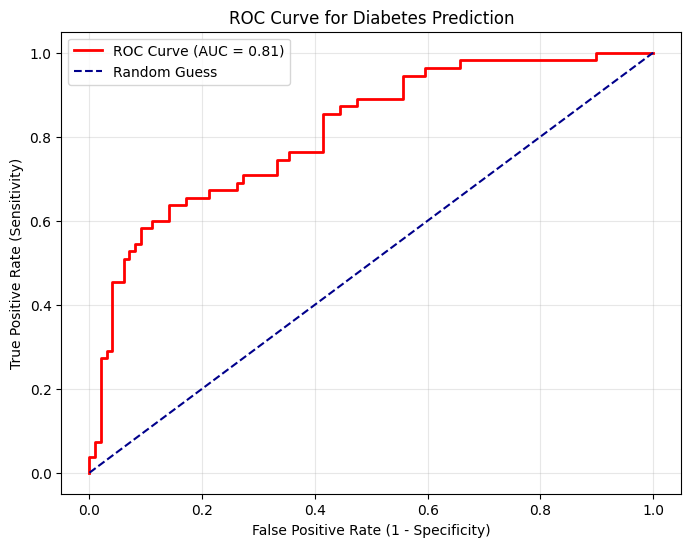

In [59]:
# 1. Calculate AUC Score
auc = roc_auc_score(y_test, y_pred_proba)

# 2. Calculate ROC Curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Plot
plt.figure(figsize=(8, 6))

# Plot the model's curve
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC Curve (AUC = {auc:.2f})')

# Plot the "Random Guess" line (diagonal)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Guess')

# Formatting
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Diabetes Prediction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

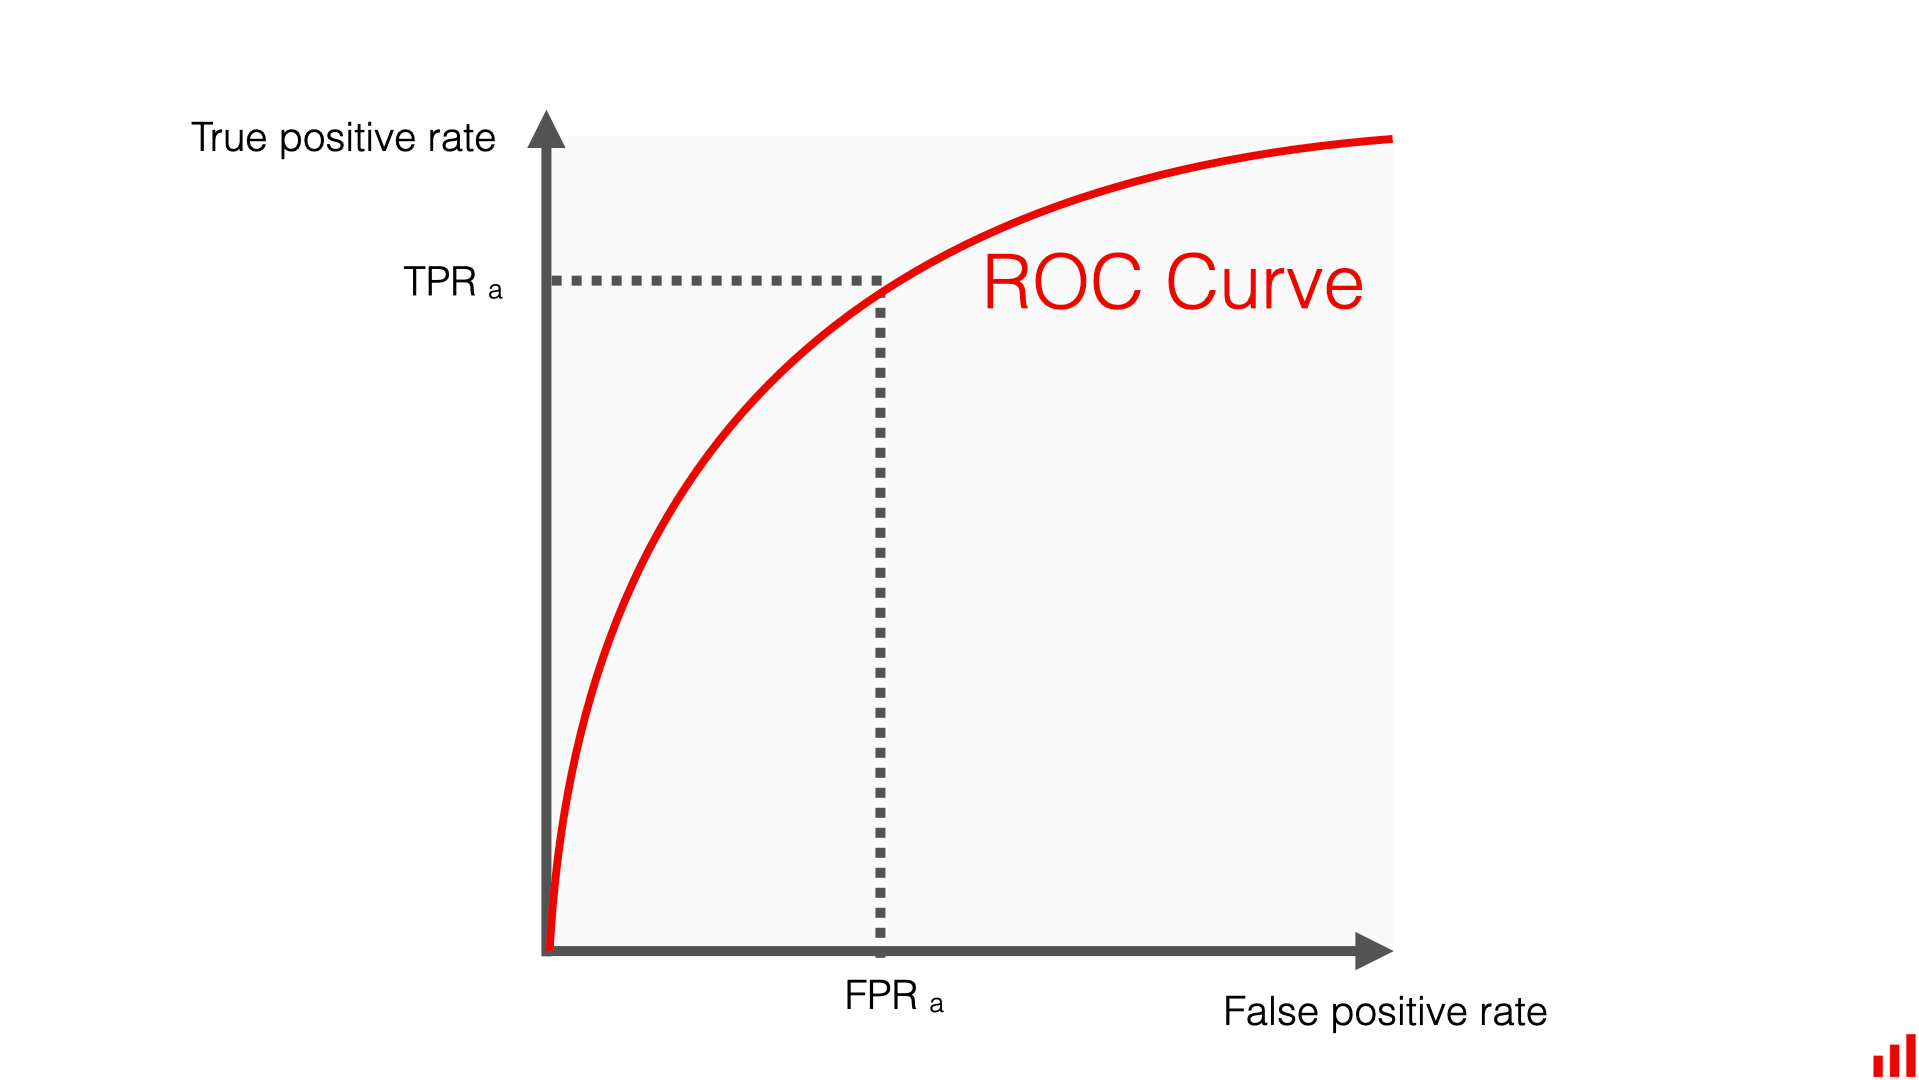

## 2. Interpretation

1.  **The Curve:**
    * We want the red line to be as close to the **top-left corner** as possible. This means we are catching all the positive cases (High TPR) without raising false alarms (Low FPR).
    * If the curve hugs the diagonal blue line, the model is not learning anything useful.

2.  **The AUC Score:**
    * **> 0.9:** Excellent classifier.
    * **0.8 - 0.9:** Good classifier.
    * **0.7 - 0.8:** Fair classifier.
    * **< 0.6:** Poor classifier.
    * *Note:* For complex medical data like this, a score around 0.8 is often considered quite good.